In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [207]:
# Load dataset (replace 'your_file.csv' with the actual file name)
df = pd.read_csv('../data/train.csv')

# Select categorical columns | get only the Object Type columns, not value number columns
categorical_cols = df.select_dtypes(include=['object']).columns

# print(categorical_cols) 
"""
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        ...
       'SaleType', 'SaleCondition'],
      dtype='object')
"""

"\nIndex(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',\n        ...\n       'SaleType', 'SaleCondition'],\n      dtype='object')\n"

In [208]:
# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0] # Get the most common value
    
    # print(df[col].mode())
    # print((col) + ' = ' + (df[col].mode()[0]))
    """
        MSZoning = RL
        Street = Pave
    """
    
    # df[col].fillna(mode) - Wrong way, still contain NaN value
    df[col] = df[col].fillna(mode) # Right way - Fill missing values in those Obj type Columns
    """ 
        In essence, this line of code replaces all NaN values in the column 
        specified by col within the DataFrame df with the value stored in the mode variable, 
        and it performs this modification directly on the original DataFrame.
    """
# df.head(10)

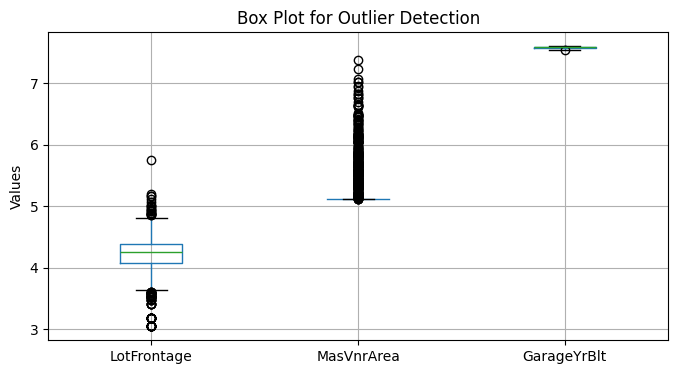

In [209]:
# Caution: only run this once, multiple run will clearing the plot, need to re-run the dataframe above
# Fix by run this section in same section above - Seperate for learning purpose
# set these features, which need to consider from Business require, bring to Plot Box
features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Plot box plots
# this line cause by multiple run, cuausing all features data NaN at 4th run

df[features]=np.log(df[features]) 
df[features].boxplot(figsize=(8, 4)) # set Figure Box size

# print(df[features].boxplot(figsize=(8, 4)))
# Axes(0.125,0.11;0.775x0.77)

# print(np.log(df[features]))
"""
          LotFrontage  MasVnrArea  GarageYrBlt
    0        1.428968    1.663569     2.028464
    1        1.477511         NaN     2.026677
    ...           ...         ...          ...
    1257     1.392612         NaN          NaN
    1258     1.405493    1.649429     2.028595
    
    [1259 rows x 3 columns]
"""
# Print the Box
plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

In [210]:
# Get Columns Median value, then fill for NaN for this value NaN in relative column

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# print(numerical_columns)
"""
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    ...
   'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
  dtype='object')
"""

for col in numerical_columns:
    median = df[col].median() # Get Median for this column
    
    # print(col, "=", median)
    """
        MSSubClass = 50.0
        LotFrontage = 4.248495242049359
        LotArea = 9452.0
        OverallQual = 6.0
        OverallCond = 5.0
    """
    # Replace nulls with median, remember the Right way above cell code
    df[col] = df[col].fillna(median) 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,4.382027,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,4.219508,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,4.094345,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,4.430817,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [211]:
# Get columns that contain 'Yr' or 'Year'
year_columns = [feature for feature in numerical_columns if 'Yr' in feature or 'Year' in feature]
# year_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

# print(df[year_columns])
"""
          YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
    0          2003          2003     7.602401    2008
    1          1976          1976     7.588830    2007
    ...         ...           ...          ...     ...
    1258       2005          2005     7.603399    2008
    
    [1259 rows x 4 columns]
"""

# Convert year values into age-related features
for col in year_columns:
    df[col] = df['YrSold'] - df[col]
# print(df[year_columns])
"""
          YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
    0             5             5  2000.397599       0
    1            31            31  1999.411170       0
    ...         ...           ...          ...     ...
    1258          3             3  2000.396601       0
    [1259 rows x 4 columns]
"""
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,0,WD,Normal,208500
1,2,20,RL,4.382027,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,5,0,WD,Normal,181500
2,3,60,RL,4.219508,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,9,0,WD,Normal,223500
3,4,70,RL,4.094345,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,0,WD,Abnorml,140000
4,5,60,RL,4.430817,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,12,0,WD,Normal,250000


In [212]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
# print(numerical_columns) # all columns type number

# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns
# print(numerical_0s) # fill less columns than above

# Remove columns that contain zeros from consideration
numerical_columns = numerical_columns.difference(numerical_0s)
# print(df[numerical_columns]) # List columns has value number not 0


# This step is to Skew vars from columns to Plot visualize below
# Calculate skewness for the remaining numerical columns
# Skewness is calculate by 3 Variable, called 3M = [ Mean, Median, Mode ]
skewness = df[numerical_columns].skew()
# print(df[numerical_columns].skew())
"""
    1stFlrSF         0.971301
    GarageYrBlt     -0.705949
    GrLivArea        1.186075
    Id               0.000000
    LotArea         12.348242
    LotFrontage     -1.024363
    MSSubClass       1.404451
    MoSold           0.195272
    OverallCond      0.647664
    OverallQual      0.203870
    SalePrice        1.963159
    TotRmsAbvGrd     0.680167
    YearBuilt       -0.614581
    YearRemodAdd    -0.501931
    YrSold           0.114031
    dtype: float64
"""

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)
"""
    Skewed Columns:
    GrLivArea       1.186075
    LotArea        12.348242
    LotFrontage    -1.024363
    MSSubClass      1.404451
    SalePrice       1.963159
    dtype: float64
"""


Skewed Columns:
GrLivArea       1.186075
LotArea        12.348242
LotFrontage    -1.024363
MSSubClass      1.404451
SalePrice       1.963159
dtype: float64


'\n    Skewed Columns:\n    GrLivArea       1.186075\n    LotArea        12.348242\n    LotFrontage    -1.024363\n    MSSubClass      1.404451\n    SalePrice       1.963159\n    dtype: float64\n'

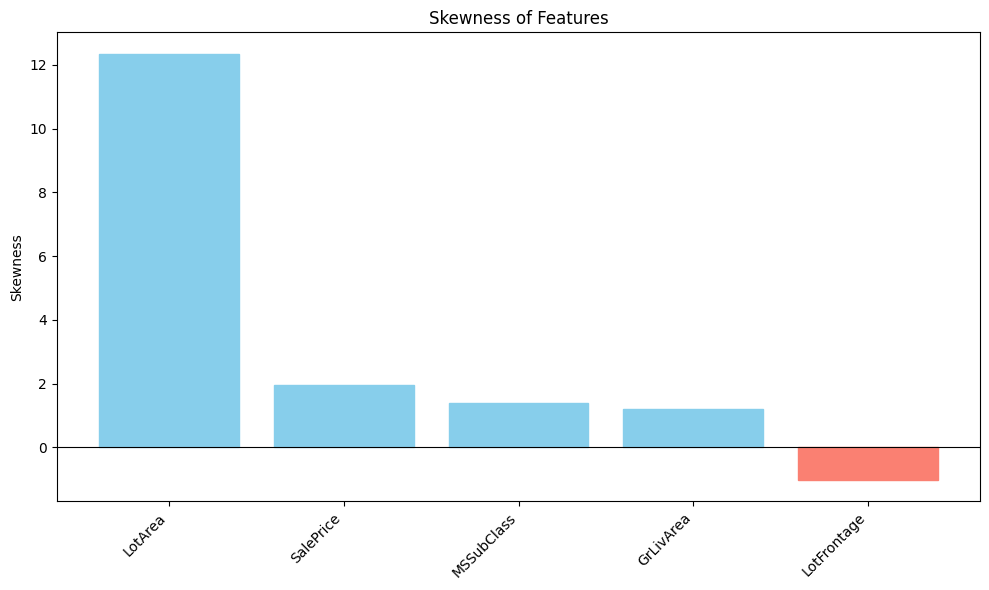

In [213]:
# These below block is to explain the above skewness calculate - skew()

skewness_data = skewed_columns
# skewed_columns
# skewness
# numerical_columns # this not skewness yet, so will cause visualize failure 

# Example:
# skewness_data = {
#     '1stFlrSF': 0.971301,
#     'GarageYrBlt': -0.705949,
#      ...
#     'YrSold': 0.114031
# }

# Convert to DataFrame
df_skew = pd.DataFrame(list(skewness_data.items()), columns=['Feature', 'Skewness'])

# Sort by skewness
df_skew_sorted = df_skew.sort_values(by='Skewness', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df_skew_sorted['Feature'], df_skew_sorted['Skewness'])
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Features')
plt.ylabel('Skewness')
plt.tight_layout()

# Highlight positive and negative skewness
for bar in bars:
    if bar.get_height() > 0:
        bar.set_color('skyblue')
    elif bar.get_height() < 0:
        bar.set_color('salmon')

plt.show()

In [214]:

# The list of highly skewed features identified earlier
skew_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

# Apply log transformation to each skewed feature
for col in skew_features:
    df[col] = np.log(df[col])
print(df[col])
# Display the transformed SalePrice column
print(df['SalePrice'])
"""
    0       12.247694
    1       12.109011
              ...    
    1258    12.154779
    Name: SalePrice, Length: 1259, dtype: float64
"""

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1254    12.016122
1255    11.755872
1256    12.616525
1257    11.511925
1258    12.154779
Name: SalePrice, Length: 1259, dtype: float64
0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1254    12.016122
1255    11.755872
1256    12.616525
1257    11.511925
1258    12.154779
Name: SalePrice, Length: 1259, dtype: float64


'\n    0       12.247694\n    1       12.109011\n              ...    \n    1258    12.154779\n    Name: SalePrice, Length: 1259, dtype: float64\n'

in_array :  0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1254    12.016122
1255    11.755872
1256    12.616525
1257    11.511925
1258    12.154779
Name: SalePrice, Length: 1259, dtype: float64
out_array :  0       2.505338
1       2.493950
2       2.510994
3       2.472277
4       2.520050
          ...   
1254    2.486249
1255    2.464353
1256    2.535007
1257    2.443383
1258    2.497722
Name: SalePrice, Length: 1259, dtype: float64


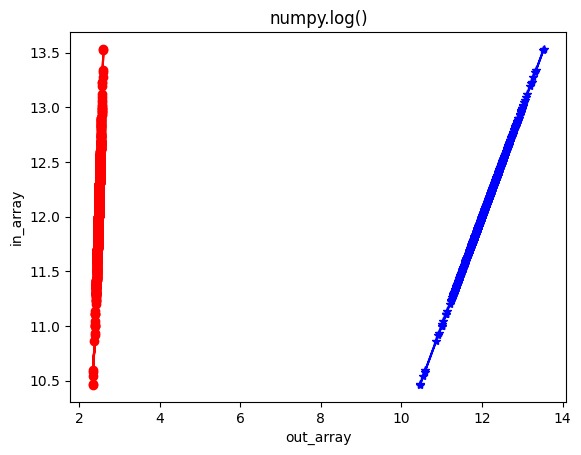

In [215]:
# Explain for the np.log() ---

# in_array = [1, 1.2, 1.4, 1.6, 1.8, 2]
# out_array = np.log(in_array)
# out_array = (in_array)

in_array = df[col]
out_array = np.log(in_array)

print ("in_array : ", in_array)
print ("out_array : ", out_array)

plt.plot(in_array, in_array, 
         color = 'blue', marker = "*")
# red for numpy.log()
plt.plot(out_array, in_array, 
         color = 'red', marker = "o")
         
plt.title("numpy.log()")
plt.xlabel("out_array")
plt.ylabel("in_array")
plt.show()

In [234]:
# Select categorical 
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply target encoding
for col in categorical_columns:
    # Compute mean SalePrice for each category
    labels_ordered = df.groupby([col])['SalePrice'].mean().sort_values().index
    print(labels_ordered)
    
    # Assign numerical values based on target variable mean
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}

    # Map encoded values back to the dataframe
    df[col] = df[col].map(labels_ordered)
df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,1.428968,9.041922,1,1,0,1,1,...,0,0,2,1,0,2,0,4,4,12.247694
1,2,20,3,1.477511,9.169518,1,1,0,1,1,...,0,0,2,1,0,5,0,4,4,12.109011
2,3,60,3,1.439718,9.328123,1,1,1,1,1,...,0,0,2,1,0,9,0,4,4,12.317167
3,4,70,3,1.409607,9.164296,1,1,1,1,1,...,0,0,2,1,0,2,0,4,1,11.849398
4,5,60,3,1.488584,9.565214,1,1,1,1,1,...,0,0,2,1,0,12,0,4,4,12.429216
5,6,50,3,1.491251,9.554993,1,1,1,1,1,...,0,0,2,1,700,10,0,4,4,11.870600
6,7,20,3,1.462674,9.218705,1,1,0,1,1,...,0,0,2,1,0,8,0,4,4,12.634603
7,8,60,3,1.446565,9.247829,1,1,1,1,1,...,0,0,2,1,350,11,0,4,4,12.206073
8,9,50,1,1.369104,8.719317,1,1,0,1,1,...,0,0,2,1,0,4,0,4,1,11.774520
9,10,190,3,1.364055,8.911934,1,1,0,1,1,...,0,0,2,1,0,1,0,4,4,11.678440
